In [ ]:
import pandas as pd

# Load datasets
data = pd.read_csv('/content/drive/MyDrive/IDS/Data.csv')
labels = pd.read_csv('/content/drive/MyDrive/IDS/Label.csv')

In [ ]:
print("Data Shape:", data.shape)
print("Labels Shape:", labels.shape)

Data Shape: (447915, 76)
Labels Shape: (447915, 1)


In [ ]:
print("\nData Head:\n", data.head())
print("\nLabels Head:\n", labels.head())


Data Head:
    Flow Duration  Total Fwd Packet  Total Bwd packets  \
0         214392                 9                 21   
1        2376792                 9                  3   
2         131350                10                  3   
3         164796                 6                  3   
4         163418                 6                  3   

   Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                       388.0                     24564.0   
1                       752.0                         0.0   
2                      7564.0                         0.0   
3                       770.0                         0.0   
4                       400.0                         0.0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                  194.0                    0.0               43.111111   
1                  188.0                    0.0               83.555556   
2                 1460.0                    0.0     

In [ ]:
print("\nMissing Values in Data:\n", data.isnull().sum())
print("\nMissing Values in Labels:\n", labels.isnull().sum())


Missing Values in Data:
 Flow Duration                 0
Total Fwd Packet              0
Total Bwd packets             0
Total Length of Fwd Packet    0
Total Length of Bwd Packet    0
                             ..
Active Min                    0
Idle Mean                     0
Idle Std                      0
Idle Max                      0
Idle Min                      0
Length: 76, dtype: int64

Missing Values in Labels:
 Label    0
dtype: int64


In [ ]:
# Check label distribution (class balance)
print("\nLabel Distribution:\n", labels.value_counts())


Label Distribution:
 Label
0        358332
4         30951
5         29613
7         16735
6          4632
3          4467
8          2102
2           452
1           385
9           246
Name: count, dtype: int64


In [ ]:
print("\nUnique Classes in Labels:\n", labels.nunique())


Unique Classes in Labels:
 Label    10
dtype: int64


In [ ]:
# Merge datasets
combined_df = pd.concat([data, labels], axis=1)

# Save the merged dataset
combined_df.to_csv('Merged_Dataset.csv', index=False)

print("✅ Datasets merged successfully! Shape:", combined_df.shape)

✅ Datasets merged successfully! Shape: (447915, 77)


Class Distribution Before Balancing:
 Label
0    358332
4     30951
5     29613
7     16735
6      4632
3      4467
8      2102
2       452
1       385
9       246
Name: count, dtype: int64


<ipython-input-10-24fed77d1d40>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


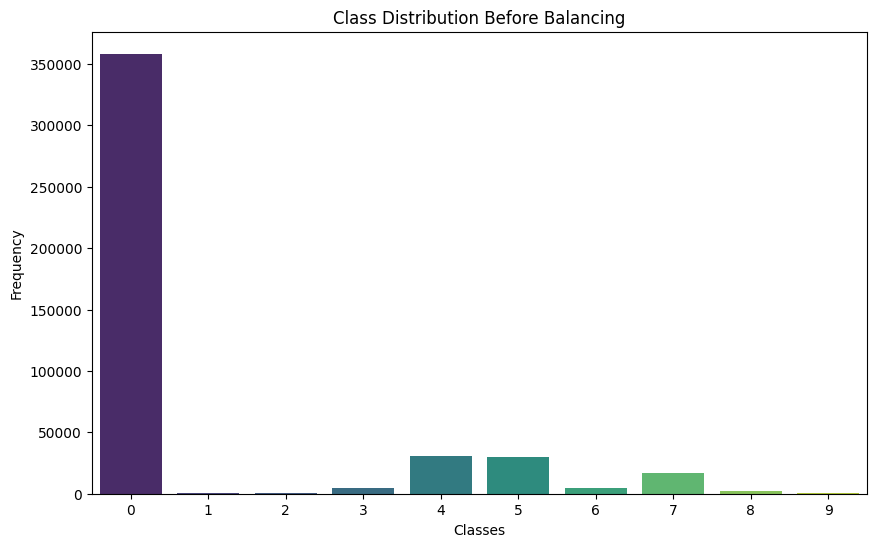

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check label distribution (last column is the label)
label_column = 'Label'
label_counts = combined_df[label_column].value_counts()

print("Class Distribution Before Balancing:\n", label_counts)

# Visualize class imbalance
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Class Distribution Before Balancing')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()


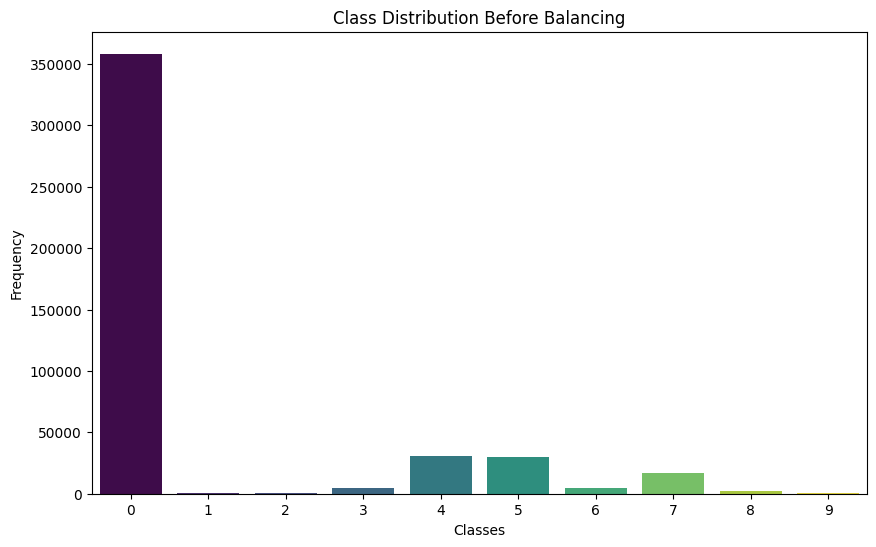

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class imbalance (fixed warning)
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index, legend=False, palette='viridis')
plt.title('Class Distribution Before Balancing')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()


In [ ]:
!pip install smote-variants # Install the smote_variants package

In [ ]:
import numpy as np
import smote_variants as sv
from sklearn.model_selection import train_test_split

# Split features and labels
X = combined_df.drop(columns=[label_column])
y = combined_df[label_column]

# Check feature and label shape
print("Features Shape:", X.shape)
print("Labels Shape:", y.shape)

# SMOTE-PSOBAT Oversampling
smote_psobat = sv.SMOTE_PSOBAT()
X_res_psobat, y_res_psobat = smote_psobat.sample(X.to_numpy(), y.to_numpy())

print("After SMOTE-PSOBAT: Features:", X_res_psobat.shape, " Labels:", y_res_psobat.shape)

# Save balanced dataset
balanced_psobat_df = pd.DataFrame(X_res_psobat, columns=X.columns)
balanced_psobat_df[label_column] = y_res_psobat
balanced_psobat_df.to_csv('Balanced_Dataset_PSOBAT.csv', index=False)
print("✅ Balanced dataset (SMOTE-PSOBAT) saved!")

# SMOTE-KMeans Oversampling
smote_kmeans = sv.SMOTE_KMeans()
X_res_kmeans, y_res_kmeans = smote_kmeans.sample(X.to_numpy(), y.to_numpy())

print("After SMOTE-KMeans: Features:", X_res_kmeans.shape, " Labels:", y_res_kmeans.shape)

# Save balanced dataset
balanced_kmeans_df = pd.DataFrame(X_res_kmeans, columns=X.columns)
balanced_kmeans_df[label_column] = y_res_kmeans
balanced_kmeans_df.to_csv('Balanced_Dataset_KMeans.csv', index=False)
print("✅ Balanced dataset (SMOTE-KMeans) saved!")


2025-02-21 16:13:46,322:INFO:SMOTE_PSOBAT: Running sampling via ('SMOTE_PSOBAT', "{'maxit': 50, 'c1': 0.3, 'c2': 0.1, 'c3': 0.1, 'alpha': 0.9, 'gamma': 0.9, 'method': 'bat', 'nn_params': {}, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': None}, 'n_jobs': 1, 'random_state': None, 'class_name': 'SMOTE_PSOBAT'}")
INFO:smote_variants:SMOTE_PSOBAT: Running sampling via ('SMOTE_PSOBAT', "{'maxit': 50, 'c1': 0.3, 'c2': 0.1, 'c3': 0.1, 'alpha': 0.9, 'gamma': 0.9, 'method': 'bat', 'nn_params': {}, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': None}, 'n_jobs': 1, 'random_state': None, 'class_name': 'SMOTE_PSOBAT'}")


Features Shape: (447915, 76)
Labels Shape: (447915,)


2025-02-21 16:13:46,349:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.047714173390391, 'n_neighbors': 2, 'nn_params': {'metric_tensor': None}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
INFO:smote_variants:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.047714173390391, 'n_neighbors': 2, 'nn_params': {'metric_tensor': None}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2025-02-21 16:13:46,376:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2025-02-21 16:13:46,381:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: kneigh

In [ ]:
# Check class distribution after SMOTE
print("Class Distribution (SMOTE-PSOBAT):\n", balanced_psobat_df[label_column].value_counts())
print("Class Distribution (SMOTE-KMeans):\n", balanced_kmeans_df[label_column].value_counts())
